# Linear Regressions

In [16]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
with open('passes.p', 'rb') as f:
    df = pickle.load(f)

In [6]:
df.head()

,match_id,location,team,player,tags,subevent,precip_mm,wind_kmph,temp_c,precipitation,wind,temperature
0,2499719,London,Arsenal,A. Lacazette,1,Simple pass,0.0,15,19,no,light,mild
1,2499719,London,Arsenal,R. Holding,1,High pass,0.0,15,19,no,light,mild
2,2499719,London,Arsenal,M. Özil,1,Head pass,0.0,15,19,no,light,mild
3,2499719,London,Arsenal,Mohamed Elneny,1,Head pass,0.0,15,19,no,light,mild
4,2499719,London,Arsenal,Bellerín,1,Simple pass,0.0,15,19,no,light,mild


In [39]:
# Create DataFrame of only match conditions (explanatory variables) and passes (target variables)
lrdf = df.groupby(
    ['match_id', 'precip_mm', 'wind_kmph', 'temp_c']
)['tags'].value_counts().unstack().reset_index()
lrdf['total'] = lrdf[0] + lrdf[1]
lrdf.rename(columns={0: 'not_accurate', 1: 'accurate'}, inplace=True)
lrdf.drop(columns='match_id', inplace=True)

In [42]:
lrdf.head()

tags,precip_mm,wind_kmph,temp_c,not_accurate,accurate,total
0,0.0,15,19,157,679,836
1,0.1,22,18,132,806,938
2,0.0,14,20,113,699,812
3,0.0,14,20,158,485,643
4,0.5,20,16,138,611,749


## Quick Additional EDA
A quick look into how the data appears

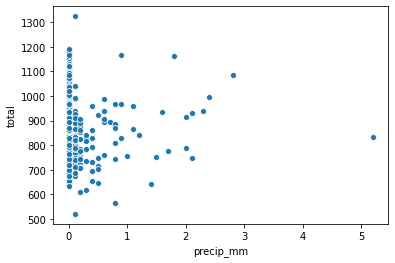

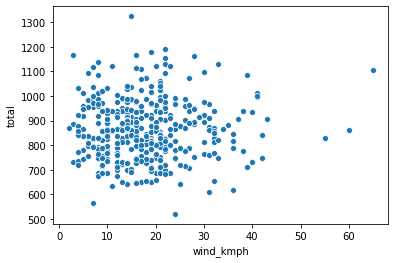

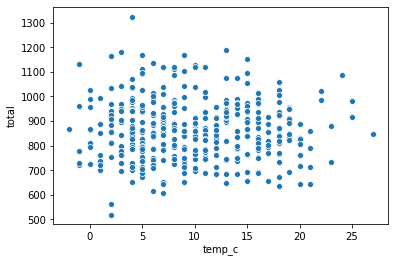

In [43]:
for w in ['precip_mm', 'wind_kmph', 'temp_c']:
    sns.scatterplot(data=lrdf, x=w, y='total')
    plt.show()

## Quick Regression
###  Total passes in a match
No transformations, raw weather data as predictors of match passes:

\\(R^2 = 0.0015\\)

As expected, very poor value.

In [56]:
options = ['temp_c', 'precip_mm', 'wind_kmph']
X = lrdf[options]
y = lrdf['total']

In [57]:
lin_reg = LinearRegression()
model = lin_reg.fit(X, y)

In [59]:
# R^2 score
round(model.score(X, y), 4)

0.0015

### Total passes in a match by team
Highest \\(R^2 = 0.2085\\), Manchester City

Lowest \\(R^2 = 0.0042 \\), Huddersfield Town

Notes: 

In [63]:
def choose_team(df, team):
    df = df.loc[df['team'] == team]
    lrdf = df.groupby(
        ['match_id', 'precip_mm', 'wind_kmph', 'temp_c']
    )['tags'].value_counts().unstack().reset_index()
    lrdf['total'] = lrdf[0] + lrdf[1]
    lrdf.rename(columns={0: 'not_accurate', 1: 'accurate'}, inplace=True)
    lrdf.drop(columns='match_id', inplace=True)
    return lrdf

In [72]:
# Track highest and lowest R^2 values
high = 0
low = None
highest = None
lowest = None

# Track R^2 Values by team to determine if pass volume influences accuracy of model
r_sq_values = []
for team in df['team'].unique():
    team_df = choose_team(df, team)
    options = ['temp_c', 'precip_mm', 'wind_kmph']
    X = team_df[options]
    y = team_df['total']
    lin_reg = LinearRegression()
    model = lin_reg.fit(X, y)
    r_squared = round(model.score(X, y), 4)
    r_sq_values.append(r_squared)
    print(f'{team} R-Squared: {r_squared}')
    if low == None:
        low = r_squared
        lowest = team
    if high < r_squared:
        high = r_squared
        highest = team
    if low > r_squared:
        low = r_squared
        lowest = team
print('-'*30)
print(f'Highest R-Squared: {high}, {highest}')
print(f'Lowest r-Squared: {low}, {lowest}')

Arsenal R-Squared: 0.102
Leicester City R-Squared: 0.1126
Manchester City R-Squared: 0.2085
Brighton & Hove Albion R-Squared: 0.0831
Burnley R-Squared: 0.073
Chelsea R-Squared: 0.1136
Crystal Palace R-Squared: 0.1065
Huddersfield Town R-Squared: 0.0042
Everton R-Squared: 0.1397
Stoke City R-Squared: 0.0302
Manchester United R-Squared: 0.0539
West Ham United R-Squared: 0.051
Newcastle United R-Squared: 0.0486
Tottenham Hotspur R-Squared: 0.0271
Swansea City R-Squared: 0.0629
Southampton R-Squared: 0.1885
Watford R-Squared: 0.0427
Liverpool R-Squared: 0.0092
West Bromwich Albion R-Squared: 0.1942
AFC Bournemouth R-Squared: 0.0633
------------------------------
Highest R-Squared: 0.2085, Manchester City
Lowest r-Squared: 0.0042, Huddersfield Town
